

<font size="5"> <div class="alert alert-block alert-info"> Introdução a Modelos Dinâmicos (IMD): Semana 1 (Aula P2) </div> </font> 
 

     
    
  <font size="5"> Licenciatura em Ciência de Dados </font>
  
  
  
  <font size="4"> **Diana Aldea Mendes**</font>

  
    
  <font size="3"> diana.mendes@iscte-iul.pt </font> 
 
  
  <font size="4"> ISCTE-IUL, 08 de fevereiro de 2024 </font>

   

  <font size="5"> <div class="alert alert-success" role="alert"> Correlação e Regressão </div></font> 
  


In [ ]:
# carregar as bibliotecas que vamos usar neste notebook / script

library(dplyr) # para importar data frames
library(tidyr)
library(gmodels)
library(matrixStats)
library(corrplot) # para matrizes de correlação


Warning message:
"package 'dplyr' was built under R version 4.3.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'gmodels' was built under R version 4.3.3"
Warning message:
"package 'matrixStats' was built under R version 4.3.3"

Attaching package: 'matrixStats'


The following object is masked from 'package:dplyr':

    count


Warning message:
"package 'corrplot' was built under R version 4.3.3"
corrplot 0.95 loaded



## Correlação / Associação entre variáveis


In [ ]:
# Load data (R built-in data set)
# comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles
data("mtcars")

# ver a estrutura da base de dados
# str(mtcars)

# ?mtcars # para saber info sobre o dataset

my_data <- mtcars[, c(1, 3, 4, 5, 6, 7)]

# cabeçario, ver as primeiras linhas da base de dados
head(my_data, n = 6)


,mpg,disp,hp,drat,wt,qsec
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,160,110,3.90,2.620,16.46
Mazda RX4 Wag,21.0,160,110,3.90,2.875,17.02
Datsun 710,22.8,108,93,3.85,2.320,18.61
Hornet 4 Drive,21.4,258,110,3.08,3.215,19.44
Hornet Sportabout,18.7,360,175,3.15,3.440,17.02
Valiant,18.1,225,105,2.76,3.460,20.22


[, 1]	mpg	Miles/(US) gallon

[, 3]	disp	Displacement 

[, 4]	hp	Gross horsepower

[, 5]	drat	Rear axle ratio

[, 6]	wt	Weight (1000 lbs)

[, 7]	qsec	1/4 mile time

In [ ]:
# estrutura da base de dados
str(my_data)


'data.frame':	32 obs. of  6 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...


In [ ]:
# sumário com informação estatística básica sobre as variáveis
summary(my_data)

# a 2ª e 3ª colunas (disp e hp) têm uma grande amplitude de valores -- é útil logaritmizar estas variáveis


      mpg             disp             hp             drat      
 Min.   :10.40   Min.   : 71.1   Min.   : 52.0   Min.   :2.760  
 1st Qu.:15.43   1st Qu.:120.8   1st Qu.: 96.5   1st Qu.:3.080  
 Median :19.20   Median :196.3   Median :123.0   Median :3.695  
 Mean   :20.09   Mean   :230.7   Mean   :146.7   Mean   :3.597  
 3rd Qu.:22.80   3rd Qu.:326.0   3rd Qu.:180.0   3rd Qu.:3.920  
 Max.   :33.90   Max.   :472.0   Max.   :335.0   Max.   :4.930  
       wt             qsec      
 Min.   :1.513   Min.   :14.50  
 1st Qu.:2.581   1st Qu.:16.89  
 Median :3.325   Median :17.71  
 Mean   :3.217   Mean   :17.85  
 3rd Qu.:3.610   3rd Qu.:18.90  
 Max.   :5.424   Max.   :22.90  

In [11]:
# calcular a moda da variável mpg
mode_mpg <- names(sort(-table(my_data$mpg)))[1]
paste("The mode of the miles per gallon data is", mode_mpg)


[1] "The mode of the miles per gallon data is 10.4"

In [ ]:
names(my_data)


[1] "mpg"  "disp" "hp"   "drat" "wt"   "qsec"

In [ ]:
# correlação de Pearson entre 2 variáveis cor(hp,mpg, method="pearson") # por default é o pearson
cor(my_data$hp, my_data$mpg) # por default é o pearson


[1] -0.7761684

In [ ]:
# correlação de Spearman entre 2 variáveis
cor(my_data$hp, my_data$mpg, method = "spearman")


[1] -0.8946646

In [ ]:
# matriz de correlação (correlação de Pearson entre todos os pares de variáveis)
res <- cor(my_data)
round(res, 2)


# metemos a variável dependente na coluna e na linha para aparecer como na matriz de correlação abaixo:


,mpg,disp,hp,drat,wt,qsec
mpg,1.00,-0.85,-0.78,0.68,-0.87,0.42
disp,-0.85,1.00,0.79,-0.71,0.89,-0.43
hp,-0.78,0.79,1.00,-0.45,0.66,-0.71
drat,0.68,-0.71,-0.45,1.00,-0.71,0.09
wt,-0.87,0.89,0.66,-0.71,1.00,-0.17
qsec,0.42,-0.43,-0.71,0.09,-0.17,1.00


In [ ]:
# a mesma coisa, mas usando mais digitos nos coeficientes de correlação
cor(my_data, use = "complete.obs")


,mpg,disp,hp,drat,wt,qsec
mpg,1.0000000,-0.8475514,-0.7761684,0.68117191,-0.8676594,0.41868403
disp,-0.8475514,1.0000000,0.7909486,-0.71021393,0.8879799,-0.43369788
hp,-0.7761684,0.7909486,1.0000000,-0.44875912,0.6587479,-0.70822339
drat,0.6811719,-0.7102139,-0.4487591,1.00000000,-0.7124406,0.09120476
wt,-0.8676594,0.8879799,0.6587479,-0.71244065,1.0000000,-0.17471588
qsec,0.4186840,-0.4336979,-0.7082234,0.09120476,-0.1747159,1.00000000


In [ ]:
# arrondar para 3 casas decimais
round(cor(my_data), digits = 3)


,mpg,disp,hp,drat,wt,qsec
mpg,1.000,-0.848,-0.776,0.681,-0.868,0.419
disp,-0.848,1.000,0.791,-0.710,0.888,-0.434
hp,-0.776,0.791,1.000,-0.449,0.659,-0.708
drat,0.681,-0.710,-0.449,1.000,-0.712,0.091
wt,-0.868,0.888,0.659,-0.712,1.000,-0.175
qsec,0.419,-0.434,-0.708,0.091,-0.175,1.000


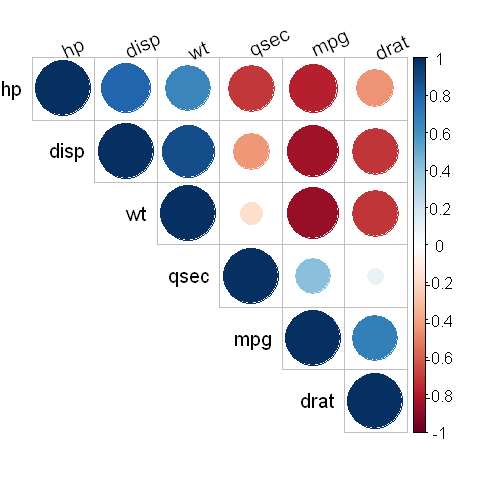

In [ ]:
# várias formas de representar uma matriz de correlação (mais visual)
# usamos library(corrplot)
# definir o tamanho da figura
options(repr.plot.width = 4, repr.plot.height = 4)

corrplot(res,
    type = "upper", order = "hclust",
    tl.col = "black", tl.srt = 25
)


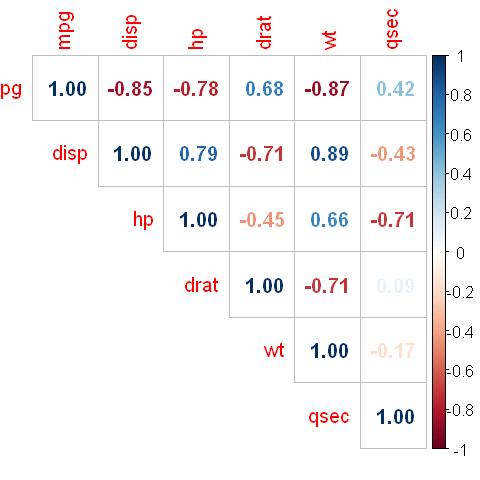

In [ ]:
# várias formas de representar uma matriz de correlação (mais visual)
corrplot(cor(my_data), method = "number", type = "upper")


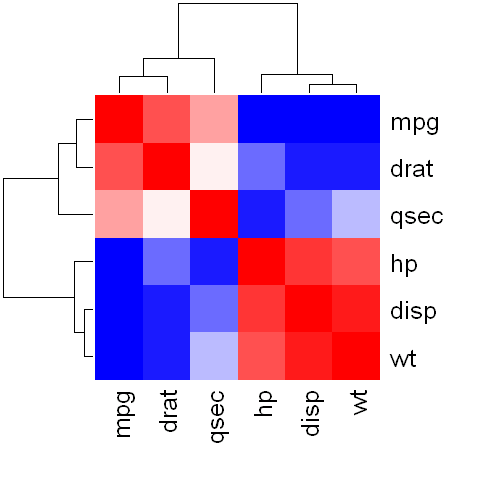

In [ ]:
col <- colorRampPalette(c("blue", "white", "red"))(20)
heatmap(x = res, col = col, symm = TRUE)


In [ ]:
# matriz de correlação para a base de dados mtcars, onde os coeficientes de correlação
# são calculados com base no método tau de Kendall

cor(mtcars, use = "complete.obs", method = "kendall")


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.0000000,-0.7953134,-0.7681311,-0.7428125,0.46454879,-0.7278321,0.31536522,0.5896790,0.46901280,0.43315089,-0.50439455
cyl,-0.7953134,1.0000000,0.8144263,0.7851865,-0.55131785,0.7282611,-0.44896982,-0.7710007,-0.49462115,-0.51254349,0.46542994
disp,-0.7681311,0.8144263,1.0000000,0.6659987,-0.49898277,0.7433824,-0.30081549,-0.6033059,-0.52027392,-0.47597955,0.41373600
hp,-0.7428125,0.7851865,0.6659987,1.0000000,-0.38262689,0.6113081,-0.47290613,-0.6305926,-0.30399557,-0.27944584,0.59598416
drat,0.4645488,-0.5513178,-0.4989828,-0.3826269,1.00000000,-0.5471495,0.03272155,0.3751011,0.57554849,0.58392476,-0.09535193
wt,-0.7278321,0.7282611,0.7433824,0.6113081,-0.54714953,1.0000000,-0.14198812,-0.4884787,-0.61387896,-0.54359562,0.37137413
qsec,0.3153652,-0.4489698,-0.3008155,-0.4729061,0.03272155,-0.1419881,1.00000000,0.6575431,-0.16890405,-0.09126069,-0.50643945
vs,0.5896790,-0.7710007,-0.6033059,-0.6305926,0.37510111,-0.4884787,0.65754312,1.0000000,0.16834512,0.26974788,-0.57692729
am,0.4690128,-0.4946212,-0.5202739,-0.3039956,0.57554849,-0.6138790,-0.16890405,0.1683451,1.00000000,0.77078758,-0.05859929
gear,0.4331509,-0.5125435,-0.4759795,-0.2794458,0.58392476,-0.5435956,-0.09126069,0.2697479,0.77078758,1.00000000,0.09801487


In [ ]:
# matriz de correlação para a base de dados mtcars, onde os coeficientes de correlação
# são calculados com base no método de Spearman

cor(mtcars, use = "complete.obs", method = "spearman")


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.0000000,-0.9108013,-0.9088824,-0.8946646,0.65145546,-0.8864220,0.46693575,0.7065968,0.56200569,0.5427816,-0.65749764
cyl,-0.9108013,1.0000000,0.9276516,0.9017909,-0.67888119,0.8577282,-0.57235095,-0.8137890,-0.52207118,-0.5643105,0.58006798
disp,-0.9088824,0.9276516,1.0000000,0.8510426,-0.68359210,0.8977064,-0.45978176,-0.7236643,-0.62406767,-0.5944703,0.53977806
hp,-0.8946646,0.9017909,0.8510426,1.0000000,-0.52012499,0.7746767,-0.66660602,-0.7515934,-0.36232756,-0.3314016,0.73337937
drat,0.6514555,-0.6788812,-0.6835921,-0.5201250,1.00000000,-0.7503904,0.09186863,0.4474575,0.68657079,0.7448162,-0.12522294
wt,-0.8864220,0.8577282,0.8977064,0.7746767,-0.75039041,1.0000000,-0.22540120,-0.5870162,-0.73771259,-0.6761284,0.49981205
qsec,0.4669358,-0.5723509,-0.4597818,-0.6666060,0.09186863,-0.2254012,1.00000000,0.7915715,-0.20333211,-0.1481997,-0.65871814
vs,0.7065968,-0.8137890,-0.7236643,-0.7515934,0.44745745,-0.5870162,0.79157148,1.0000000,0.16834512,0.2826617,-0.63369482
am,0.5620057,-0.5220712,-0.6240677,-0.3623276,0.68657079,-0.7377126,-0.20333211,0.1683451,1.00000000,0.8076880,-0.06436525
gear,0.5427816,-0.5643105,-0.5944703,-0.3314016,0.74481617,-0.6761284,-0.14819967,0.2826617,0.80768800,1.0000000,0.11488698


######################################################################################

No que segue definimos um test de correlação, isto é, formamos uma hipótese nula (pergunta) cuja valor (rejeito ou não rejeito) fica avaliada usando uma estatística test.

Neste caso, em particular, questionamos se a correlação entre 2 variáveis é realmente zero ou não (significativamente diferente de zero ou não). Pois, um dos problemas é encontrar, provar que duas variáveis são independentes (ou seja, a correlação entre elas é nula).

O teste de correlação de Pearson tem a seguinte H0: correlação zero

Rejeitamos a H0 se o valor de prova (p-value) é menor que o nível de significância 0.05 (5%).

In [ ]:
# Teste de correlação de Pearson , H0: R=0

test <- cor.test(my_data$drat, my_data$qsec)
test



	Pearson's product-moment correlation

data:  my_data$drat and my_data$qsec
t = 0.50164, df = 30, p-value = 0.6196
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.265947  0.426340
sample estimates:
       cor 
0.09120476 


## Diagrama de dispersão - Scatter plot

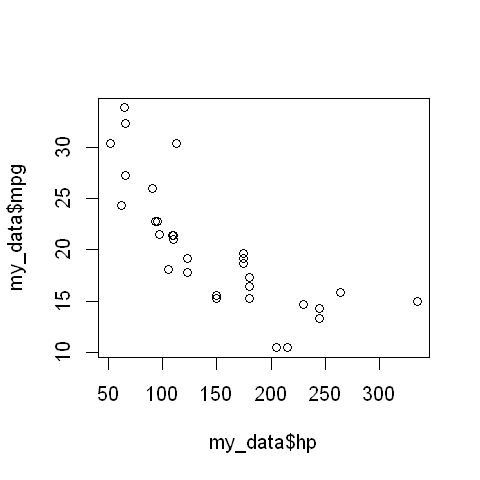

In [ ]:
# scatter plot (forma simples)

plot(my_data$hp, my_data$mpg)


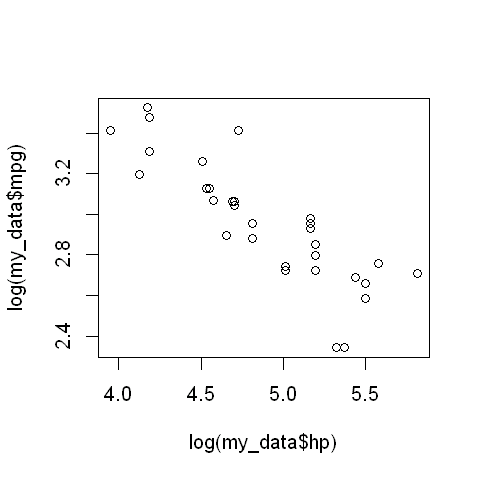

In [ ]:
plot(log(my_data$hp), log(my_data$mpg))


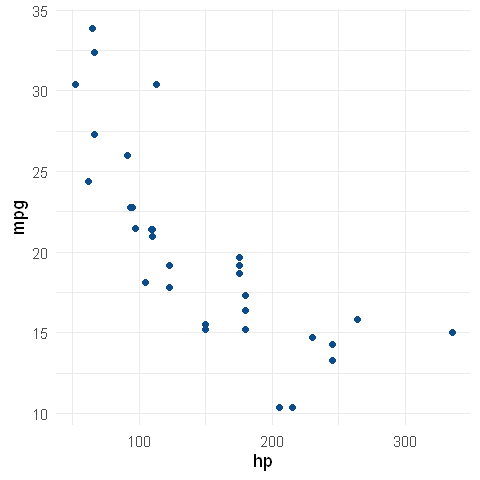

In [ ]:
# scatter plot (mais complicado, mas mais "bonito" com ggplot2)

library(ggplot2)

ggplot(my_data) +
  aes(x = hp, y = mpg) +
  geom_point(colour = "#0c4c8a") +
  theme_minimal()


`geom_smooth()` using formula = 'y ~ x'


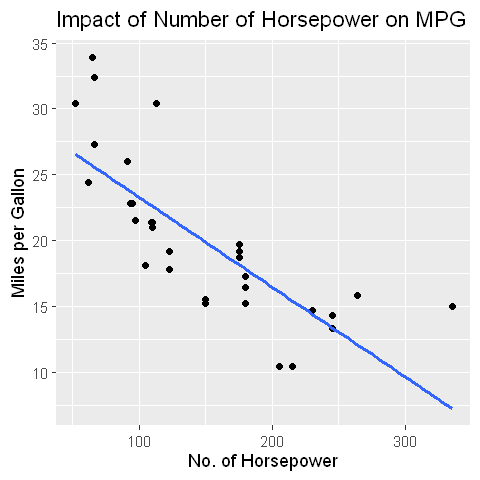

In [ ]:
ggplot(my_data, aes(hp, mpg)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  ylab("Miles per Gallon") +
  xlab("No. of Horsepower") +
  ggtitle("Impact of Number of Horsepower on MPG")


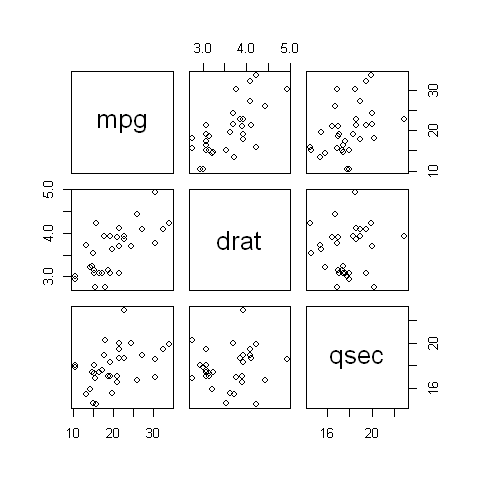

In [ ]:
# vários gráficos de dispersão
pairs(my_data[, c(1, 4, 6)])


## Regressão linear simples

Em R, a função básica para ajustar um modelo linear de regressão é lm().

Syntax:

    myfit <- lm(formula, data)

 onde a fórmula é a equação que representa a reta (hiperplano) de regressão, por exemplo
 
     y=ax+b (matemátca)  <->    y~x  (fórmula para R)
     
 onde *y* é a variável dependente (target), *x* é a variável independente (feature) e *a* e *b* são os parâmetros a determinar (o intercept e o declive da reta de regressão).



In [ ]:
# carregar as bibliotecas que vamos usar neste notebook / script

library(dplyr) # para importar data frames
library(tidyr)
library(gmodels)
library(matrixStats)
library(corrplot) # para matrizes de correlação


In [ ]:
# Load data (R built-in data set)
# comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles
data("mtcars")

my_data <- mtcars
head(my_data)


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [ ]:
# definir 2 variáveis (uma dependente e uma independente)
hp <- my_data$hp
mpg <- my_data$mpg

# ajustar o modelo de regressão linear simples para as variáveis definidas
model1 <- lm(mpg ~ hp)


In [ ]:
# output do modelo de regressão linear simples

summary(model1)

# mpg ~ hp lês mpg em função de hp...ou seja, mpg é a variável dependente

# modelo a estimar:
# mpg = a + b*hp

# coeficientes do modelo
# mpg = 30.0989 - 0.0682*hp  ( reta de regressão estimada ou ajustada)



Call:
lm(formula = mpg ~ hp)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7121 -2.1122 -0.8854  1.5819  8.2360 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.09886    1.63392  18.421  < 2e-16 ***
hp          -0.06823    0.01012  -6.742 1.79e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.863 on 30 degrees of freedom
Multiple R-squared:  0.6024,	Adjusted R-squared:  0.5892 
F-statistic: 45.46 on 1 and 30 DF,  p-value: 1.788e-07


In [ ]:
# definir 2 variáveis (uma dependente e uma independente)
cyl <- my_data$cyl
mpg <- my_data$mpg

# ajustar o modelo de regressão linear simples para as variáveis definidas
model2 <- lm(mpg ~ cyl)
summary(model2)



Call:
lm(formula = mpg ~ cyl)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9814 -2.1185  0.2217  1.0717  7.5186 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.8846     2.0738   18.27  < 2e-16 ***
cyl          -2.8758     0.3224   -8.92 6.11e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.206 on 30 degrees of freedom
Multiple R-squared:  0.7262,	Adjusted R-squared:  0.7171 
F-statistic: 79.56 on 1 and 30 DF,  p-value: 6.113e-10


In [ ]:
AIC(model1)


[1] 181.2386

In [ ]:
AIC(model2) # critério de informação de Akaike: quanto menor melhor portanto o modelo 2 é melhor que o modelo 1


[1] 169.3064

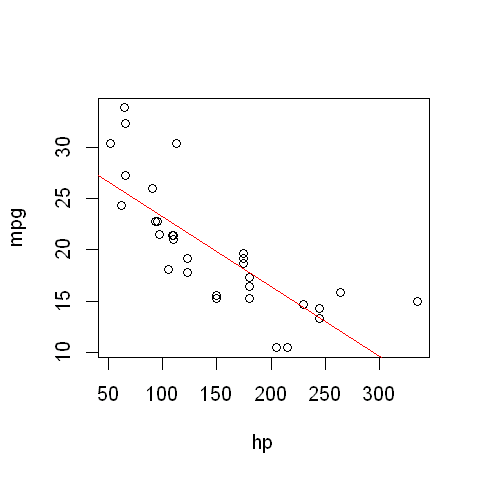

In [ ]:
# definir o tamanho da figura
options(repr.plot.width = 4, repr.plot.height = 4)

# representação gráfica dos dados e da reta de regressão estimada

plot(hp, mpg)
abline(model1, col = "red")


In [ ]:
# listar apenas os coeficientes estimados do modelo de regressão
model <- lm(mtcars$mpg ~ mtcars$disp)

coef(model) # apenas retorna os coeficientes do modelo


(Intercept) mtcars$disp 
29.59985476 -0.04121512

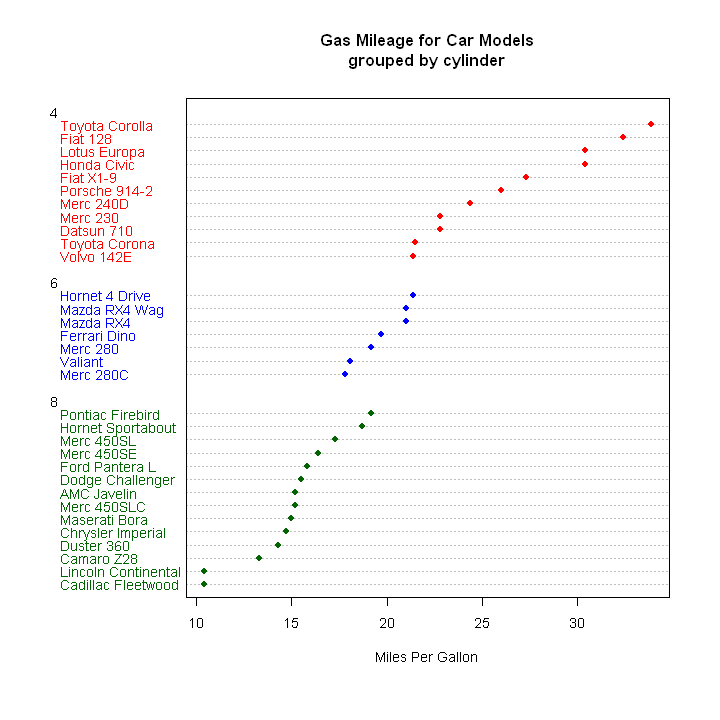

In [ ]:
# definir o tamanho da figura
options(repr.plot.width = 6, repr.plot.height = 6)

x <- mtcars[order(mtcars$mpg), ]
x$cyl <- factor(x$cyl)
x$color[x$cyl == 4] <- "red"
x$color[x$cyl == 6] <- "blue"
x$color[x$cyl == 8] <- "darkgreen"

dotchart(x$mpg,
    labels = row.names(x),
    cex = .7,
    groups = x$cyl,
    gcolor = "black",
    color = x$color,
    pch = 19,
    main = "Gas Mileage for Car Models\ngrouped by cylinder",
    xlab = "Miles Per Gallon"
)


## Transformação de variáveis

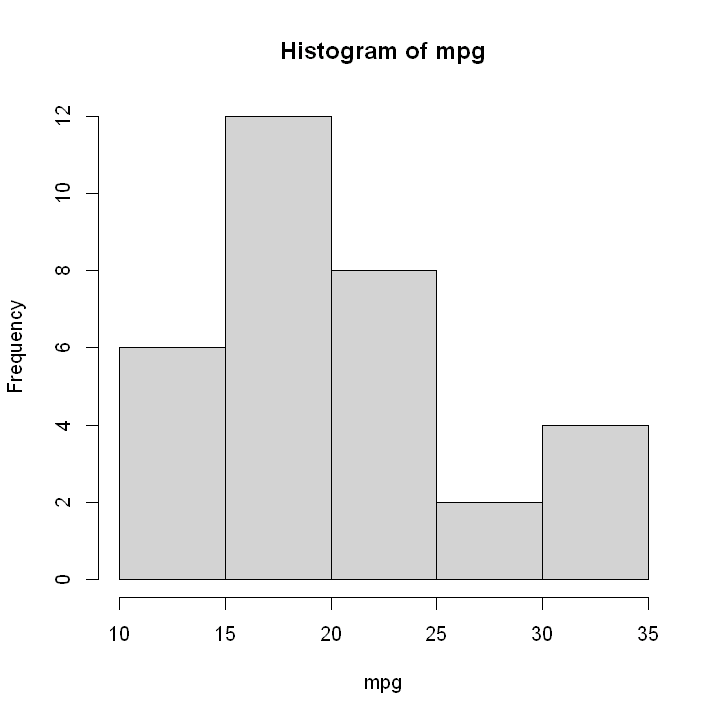

In [ ]:
hist(mpg)


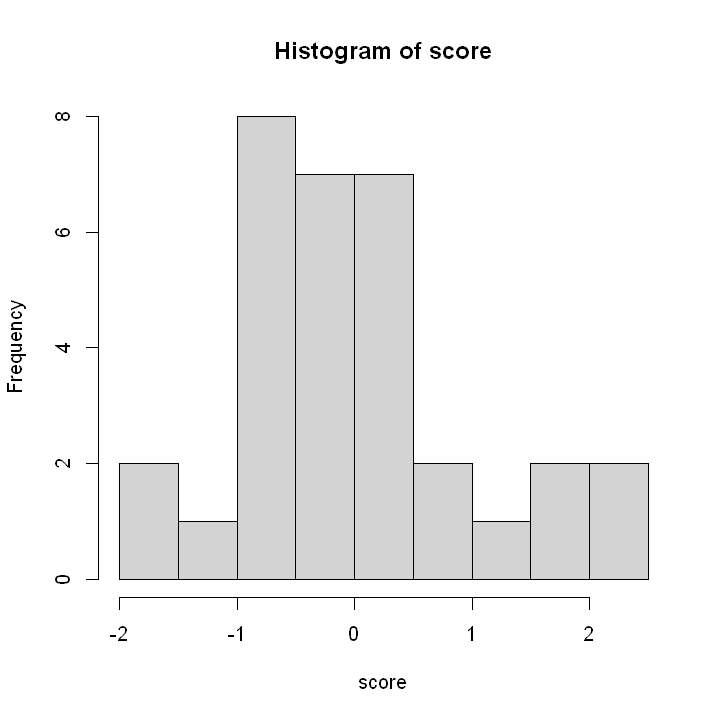

In [ ]:
# o z-score ou normalizar uma variável (scaling)

score <- scale(mpg)
hist(score)


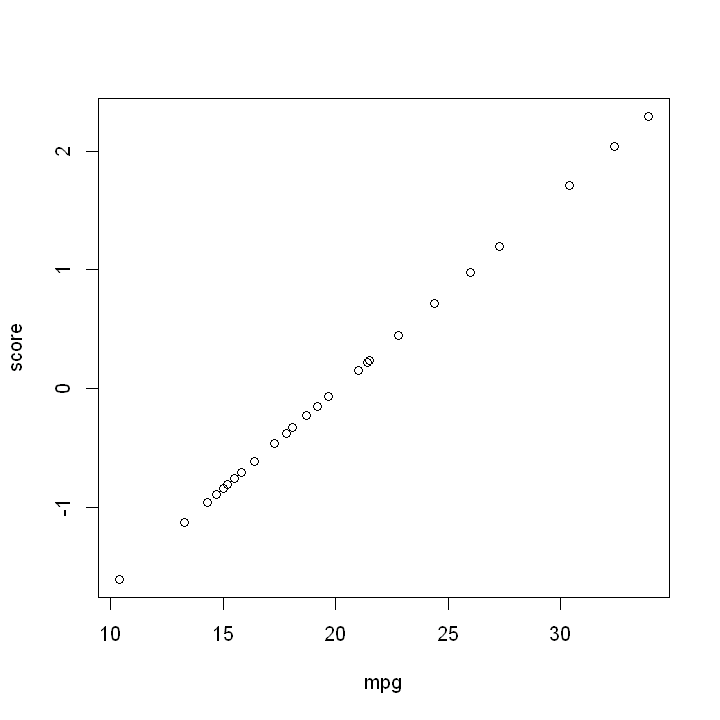

In [ ]:
# Para entender o papel da transformação, reperesenta-se o gráfico de dispersão
# entre a variável original e a variável transformada (transformação linear)

plot(mpg, score)


In [ ]:
# logaritmizar uma variável (desde que tem valores positivos)
# reduz a assimetria, diminui a escala, mas não altera as propriedades da variável

log_mpg <- log(mpg)


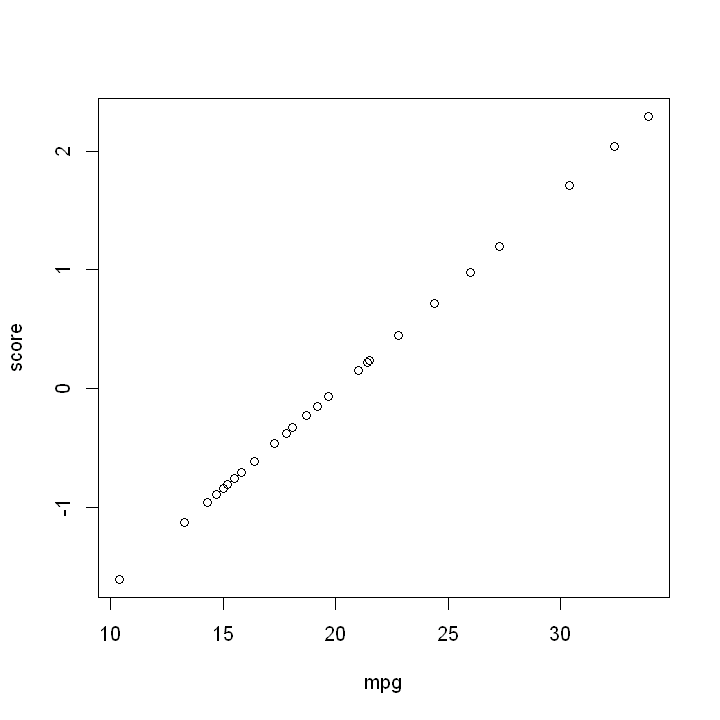

In [ ]:
plot(mpg, score)


## TPC

**Exercício 1.** Carrega a base de dados (in-built) "women".
1. Calcule a correlação entre as 2 variáveis
2. Represente graficamente o diagrama de disperssão
3. Determine a reta de regressão que melhor se ajusta aos dados

'data.frame':	15 obs. of  2 variables:
 $ height: num  58 59 60 61 62 63 64 65 66 67 ...
 $ weight: num  115 117 120 123 126 129 132 135 139 142 ...
[1] "Correlação: 0.995494767784216"



Call:
lm(formula = weight ~ height, data = women)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7333 -1.1333 -0.3833  0.7417  3.1167 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -87.51667    5.93694  -14.74 1.71e-09 ***
height        3.45000    0.09114   37.85 1.09e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.525 on 13 degrees of freedom
Multiple R-squared:  0.991,	Adjusted R-squared:  0.9903 
F-statistic:  1433 on 1 and 13 DF,  p-value: 1.091e-14


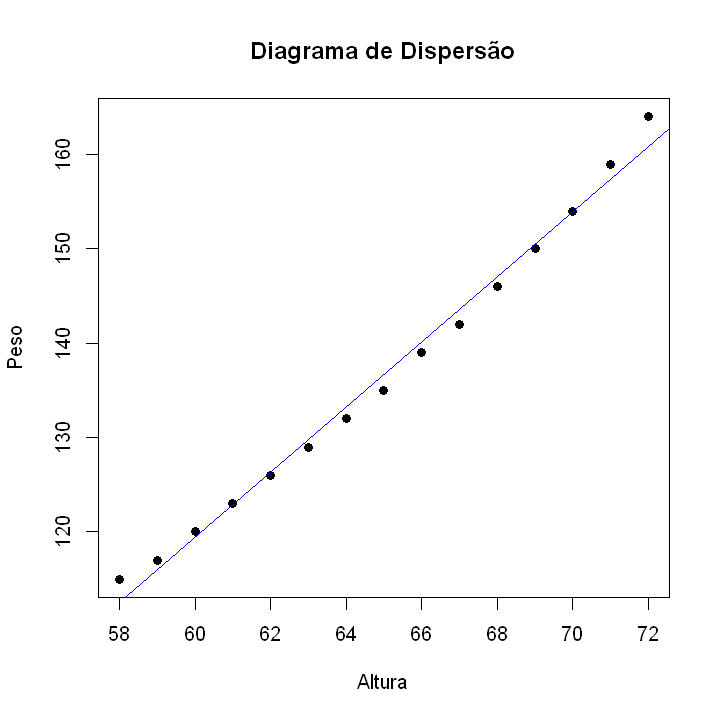

In [ ]:
# Carrega a base de dados (in-built) "women"
data(women)

# visualizar a estrutura da base de dados
str(women)

# 1. Calcular a correlação entre as 2 variáveis
correlation <- cor(women$height, women$weight)
print(paste("Correlação:", correlation))

# 2. Representar graficamente o diagrama de dispersão
plot(women$height, women$weight, main = "Diagrama de Dispersão", xlab = "Altura", ylab = "Peso", pch = 19)

# 3. Determinar a reta de regressão que melhor se ajusta aos dados
regression_model <- lm(weight ~ height, data = women)
abline(regression_model, col = "blue")
summary(regression_model)


**Exercício 2.** Carrega a base de dados "Advertising.csv" do seguinte link https://trevorhastie.github.io/ISLR/data.html.
1. Represente graficamente o correlograma das variáveis
2. Represente graficamente diagramas de disperssão
3. Determine a reta de regressão que melhor se ajusta aos dados

'data.frame':	200 obs. of  5 variables:
 $ X        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ TV       : num  230.1 44.5 17.2 151.5 180.8 ...
 $ radio    : num  37.8 39.3 45.9 41.3 10.8 48.9 32.8 19.6 2.1 2.6 ...
 $ newspaper: num  69.2 45.1 69.3 58.5 58.4 75 23.5 11.6 1 21.2 ...
 $ sales    : num  22.1 10.4 9.3 18.5 12.9 7.2 11.8 13.2 4.8 10.6 ...


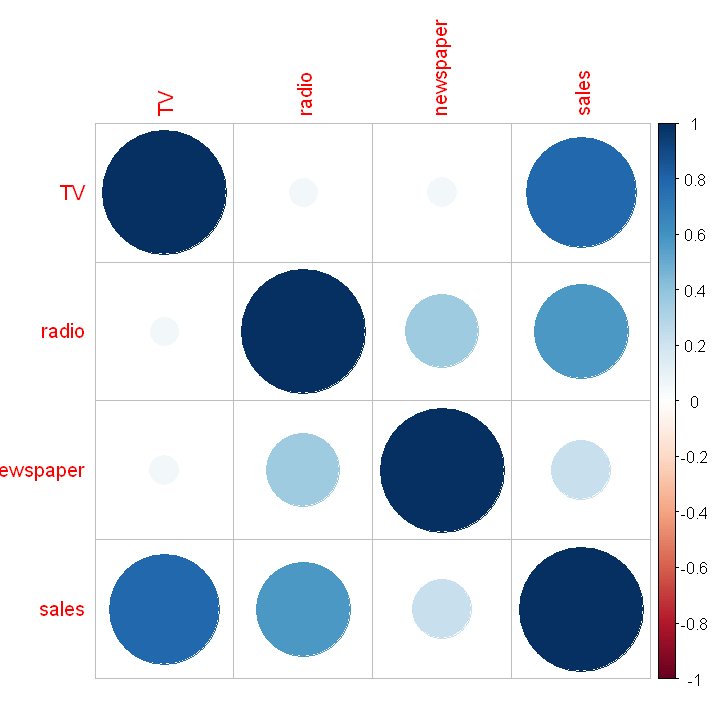

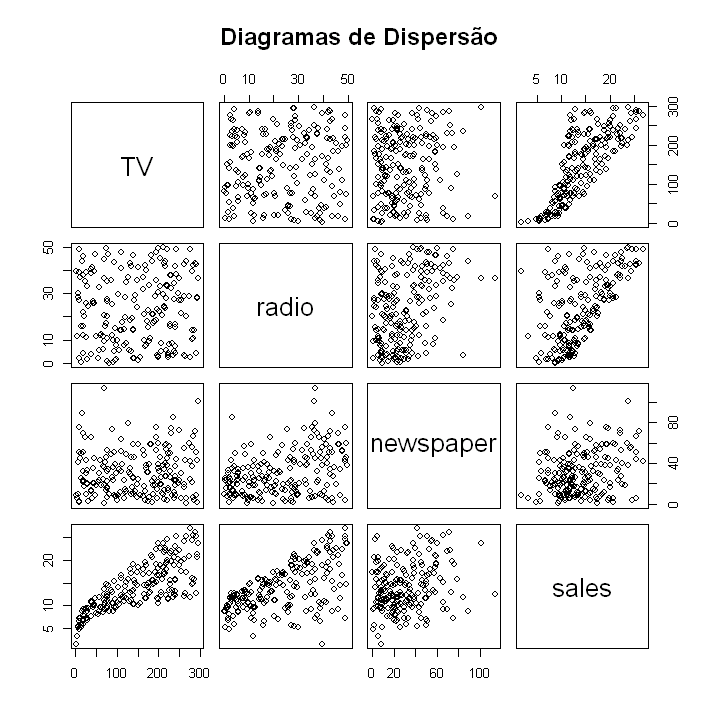


Call:
lm(formula = sales ~ TV, data = advertising)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3860 -1.9545 -0.1913  2.0671  7.2124 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.032594   0.457843   15.36   <2e-16 ***
TV          0.047537   0.002691   17.67   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.259 on 198 degrees of freedom
Multiple R-squared:  0.6119,	Adjusted R-squared:  0.6099 
F-statistic: 312.1 on 1 and 198 DF,  p-value: < 2.2e-16


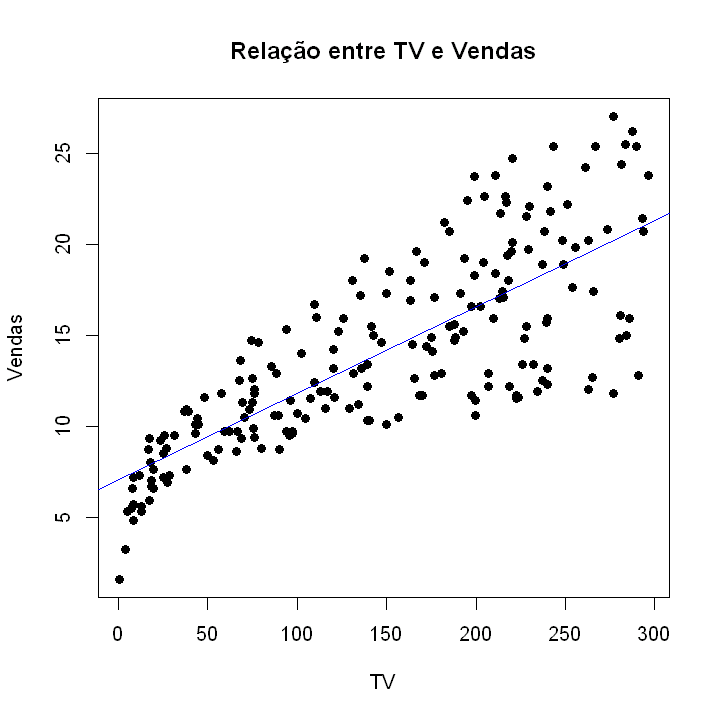

In [ ]:
# Carrega a base de dados "Advertising.csv" do link
url <- "https://trevorhastie.github.io/ISLR/Advertising.csv"
advertising <- read.csv(url)

str(advertising)

# 1. Represente graficamente o correlograma das variáveis
library(corrplot)
cor_matrix <- cor(advertising[, -1]) # Exclui a primeira coluna que é o índice
corrplot(cor_matrix, method = "circle")

# 2. Represente graficamente diagramas de dispersão
pairs(advertising[, -1], main = "Diagramas de Dispersão")

# 3. Determine a reta de regressão que melhor se ajusta aos dados
# Exemplo de regressão linear entre 'Sales' e 'TV'
regression_model <- lm(sales ~ TV, data = advertising)
plot(advertising$TV, advertising$sales, main = "Relação entre TV e Vendas", xlab = "TV", ylab = "Vendas", pch = 19)
abline(regression_model, col = "blue")
summary(regression_model)


 **Exercício 3.** Carrega a base de dados (in-built) "Income1.csv" do seguinte link https://trevorhastie.github.io/ISLR/data.html.

1. Faz uma análise exploratória dos dados.
2. Determine a reta de regressão que melhor se ajusta aos dados.

       X           Education         Income     
 Min.   : 1.00   Min.   :10.00   Min.   :15.19  
 1st Qu.: 8.25   1st Qu.:12.99   1st Qu.:29.08  
 Median :15.50   Median :16.00   Median :49.87  
 Mean   :15.50   Mean   :16.00   Mean   :50.15  
 3rd Qu.:22.75   3rd Qu.:19.01   3rd Qu.:71.14  
 Max.   :30.00   Max.   :22.00   Max.   :80.26  

'data.frame':	30 obs. of  3 variables:
 $ X        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Education: num  10 10.4 10.8 11.2 11.6 ...
 $ Income   : num  26.7 27.3 22.1 21.2 15.2 ...


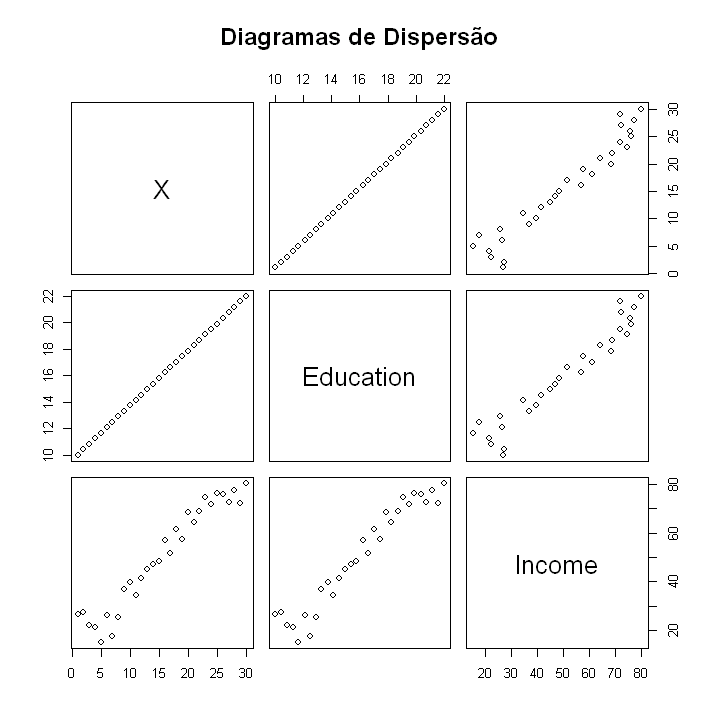


Call:
lm(formula = Income ~ Education, data = income)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.046  -2.293   0.472   3.288  10.110 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -39.4463     4.7248  -8.349  4.4e-09 ***
Education     5.5995     0.2882  19.431  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.653 on 28 degrees of freedom
Multiple R-squared:  0.931,	Adjusted R-squared:  0.9285 
F-statistic: 377.6 on 1 and 28 DF,  p-value: < 2.2e-16


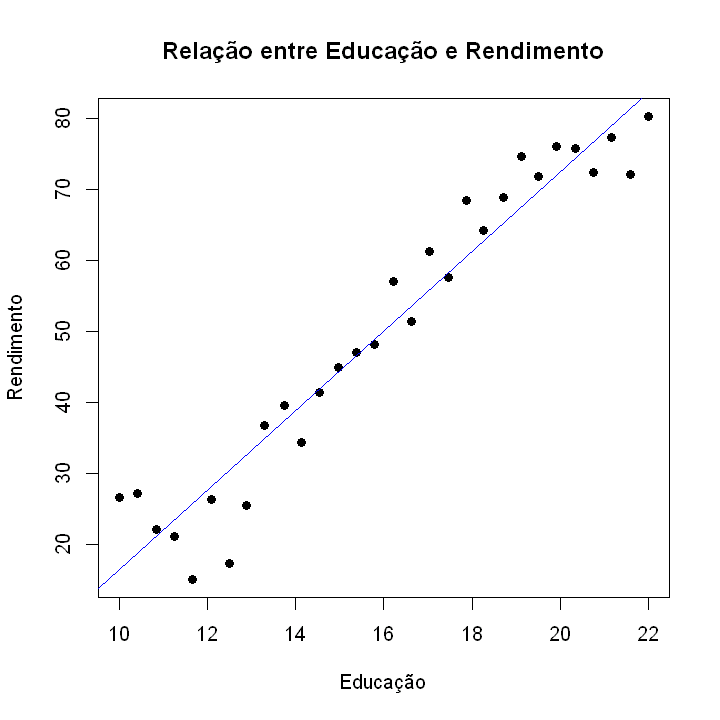

In [ ]:
# Carrega a base de dados "Income1.csv" do link
url <- "https://trevorhastie.github.io/ISLR/Income1.csv"
income <- read.csv(url)

# 1. Faz uma análise exploratória dos dados
summary(income)
str(income)
pairs(income, main = "Diagramas de Dispersão")

# 2. Determine a reta de regressão que melhor se ajusta aos dados
# Exemplo de regressão linear entre 'Income' e 'Education'
regression_model <- lm(Income ~ Education, data = income)

plot(
    income$Education,
    income$Income,
    main = "Relação entre Educação e Rendimento",
    xlab = "Educação",
    ylab = "Rendimento",
    pch = 19
)

abline(regression_model, col = "blue")
summary(regression_model)
